In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# Color setup and average function
RGB = 256
# blue
royalblue = (65/RGB,105/RGB,225/RGB)
dodgerblue = (30/RGB,144/RGB,255/RGB)
# green
green = (0/RGB,128/RGB,0/RGB)
# purple
darkorchid = (104/RGB,34/RGB,139/RGB)
# red & pink
coral = (205/RGB,91/RGB,69/RGB)
red = (139/RGB,0/RGB,0/RGB)
pink = (252/RGB,20/RGB,201/RGB)
orange = (255/RGB,128/RGB,0/RGB)

def cumsum_sma(array, period):
    ret = np.cumsum(array, dtype=float)
    ret[period:] = ret[period:] - ret[:-period]
    return ret[period - 1:] / period

In [3]:
# read the results
# 15000 episodes, 600 steps, seq 5, label/q 3.
# Task 2, Pl=0.9, q state
t = np.loadtxt('t2_Q_seq5_label3_task2_p10.csv', delimiter=',') # 15000 episodes, 600 steps
rewards_09_label_seq5 = np.loadtxt('rewards_LABEL_seq5_label3_task2_p09.csv', delimiter=',')
rewards_09_q_seq5 = np.loadtxt('rewards_Q_seq5_label3_task2_p09.csv', delimiter=',')
rewards_10_label_seq5 = np.loadtxt('rewards_LABEL_seq5_label3_task2_p10.csv', delimiter=',')
rewards_10_q_seq5 = np.loadtxt('rewards_Q_seq5_label3_task2_p10.csv', delimiter=',')

In [4]:
t_ = cumsum_sma(t,50)
rewards_09_label_seq5_ = cumsum_sma(rewards_09_label_seq5,50)
rewards_09_q_seq5_ = cumsum_sma(rewards_09_q_seq5,50)
rewards_10_label_seq5_ = cumsum_sma(rewards_10_label_seq5,50)
rewards_10_q_seq5_ = cumsum_sma(rewards_10_q_seq5,50)

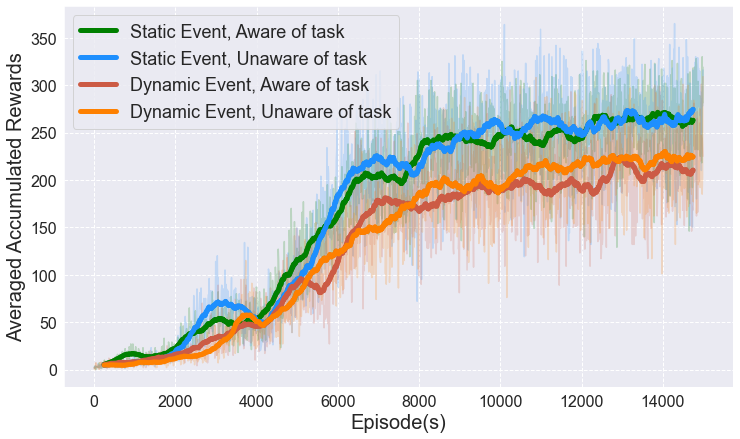

In [6]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_xlabel('Episode(s)', fontsize=20) 
ax.set_ylabel('Averaged Accumulated Rewards', fontsize=20) 

# We change the fontsize of ticks label 
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)

sns.set_style("darkgrid")

sns.lineplot(x = t_, y = rewards_10_q_seq5_, color=green, linewidth=5, label='Task 2, Pl=1.0, q state')
sns.lineplot(x = t_, y = rewards_10_label_seq5_, color=dodgerblue, linewidth=5, label='Task 2, Pl=1.0, label state')
sns.lineplot(x = t_, y = rewards_09_q_seq5_, color=coral, linewidth=5, label='Task 2, Pl=0.9, q state')
sns.lineplot(x = t_, y = rewards_09_label_seq5_, color=orange, linewidth=5, label='Task 2, Pl=0.9, label state')

sns.lineplot(x = t, y = rewards_10_q_seq5, color=green, alpha=0.2)
sns.lineplot(x = t, y = rewards_10_label_seq5, color=dodgerblue, alpha=0.2)
sns.lineplot(x = t, y = rewards_09_q_seq5, color=coral, alpha=0.2)
sns.lineplot(x = t, y = rewards_09_label_seq5, color=orange, alpha=0.2)

sns.lineplot(x = t_, y = rewards_10_q_seq5_, color=green, linewidth=5, label='Task 2, Pl=1.0, q state')
sns.lineplot(x = t_, y = rewards_10_label_seq5_, color=dodgerblue, linewidth=5, label='Task 2, Pl=1.0, label state')
sns.lineplot(x = t_, y = rewards_09_q_seq5_, color=coral, linewidth=5, label='Task 2, Pl=0.9, q state')
sns.lineplot(x = t_, y = rewards_09_label_seq5_, color=orange, linewidth=5, label='Task 2, Pl=0.9, label state')

plt.legend(['Static Event, Aware of task', 'Static Event, Unaware of task', 'Dynamic Event, Aware of task', 'Dynamic Event, Unaware of task'], fontsize=18, loc='upper left')#, title='600 steps',title_fontsize=16)
# Φ2
plt.grid(color = 'white', linestyle = '--', linewidth = 1)
plt.show()
sns.move_legend(ax, loc='upper left', frameon=False)